# <center>Análise Exploratória de Dados</center>
https://www.kaggle.com/datasets/programmerrdai/global-land-animal-slaughter-1961-2022

## Importando Bibliotecas e Criando Configurações de Estilo

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Configurações de estilo
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## Carregando o Dataset

In [76]:

df = pd.read_csv("Data/land-animals-slaughtered-for-meat.csv")
df.head()

,Entity,Code,Year,Number of chickens slaughtered to produce meat,Number of ducks slaughtered to produce meat,Number of pigs slaughtered to produce meat,Number of geese slaughtered to produce meat,Number of sheep slaughtered to produce meat,Number of rabbits slaughtered to produce meat,Number of turkeys slaughtered to produce meat,Number of goats slaughtered to produce meat,Number of cattle slaughtered to produce meat,Number of other animals slaughtered to produce meat
0,Afghanistan,AFG,1961,7000000.0,NaN,NaN,NaN,4336000.0,NaN,NaN,940000.0,360000.0,20000
1,Afghanistan,AFG,1962,7500000.0,NaN,NaN,NaN,4355000.0,NaN,NaN,875000.0,384000.0,22393
2,Afghanistan,AFG,1963,7700000.0,NaN,NaN,NaN,4673000.0,NaN,NaN,810000.0,396000.0,27952
3,Afghanistan,AFG,1964,8000000.0,NaN,NaN,NaN,5010000.0,NaN,NaN,750000.0,402000.0,26000
4,Afghanistan,AFG,1965,8500000.0,NaN,NaN,NaN,5179000.0,NaN,NaN,875000.0,408000.0,24000


## Renomeando Colunas

In [77]:
columns = ['Entity', 'Code', 'Year', 'Chickens', 'Ducks', 'Pigs', 'Geese', 'Sheep', 'Rabbits', 'Turkeys', 'Goats', 'Cattle', 'Other']
df.columns = columns
df.tail()

,Entity,Code,Year,Chickens,Ducks,Pigs,Geese,Sheep,Rabbits,Turkeys,Goats,Cattle,Other
14365,Zimbabwe,ZWE,2018,51133000.0,29000.0,174010.0,NaN,38768.0,NaN,30000.0,2164874.0,2600000.0,0
14366,Zimbabwe,ZWE,2019,71327000.0,27000.0,193820.0,NaN,51842.0,NaN,29000.0,2468732.0,2350000.0,0
14367,Zimbabwe,ZWE,2020,71207000.0,26000.0,183923.0,NaN,52614.0,NaN,30000.0,2077309.0,2300000.0,0
14368,Zimbabwe,ZWE,2021,71611000.0,24000.0,196173.0,NaN,47741.0,NaN,30000.0,2315552.0,2518655.0,0
14369,Zimbabwe,ZWE,2022,71381000.0,22000.0,191305.0,NaN,50732.0,NaN,31000.0,2365640.0,2629904.0,0


## Mudando o Formato do Dataset para Facilitar a Análise

In [78]:
df_long = df.melt(
    id_vars=["Entity", "Code", "Year"],
    value_vars=["Chickens","Ducks","Pigs","Geese","Sheep","Rabbits","Turkeys","Goats","Cattle","Other"],
    var_name="Animal",
    value_name="Value"
)

df = df_long.copy()

del df_long

df

,Entity,Code,Year,Animal,Value
0,Afghanistan,AFG,1961,Chickens,7000000.0
1,Afghanistan,AFG,1962,Chickens,7500000.0
2,Afghanistan,AFG,1963,Chickens,7700000.0
3,Afghanistan,AFG,1964,Chickens,8000000.0
4,Afghanistan,AFG,1965,Chickens,8500000.0
...,...,...,...,...,...
143695,Zimbabwe,ZWE,2018,Other,0.0
143696,Zimbabwe,ZWE,2019,Other,0.0
143697,Zimbabwe,ZWE,2020,Other,0.0
143698,Zimbabwe,ZWE,2021,Other,0.0


## Informações Básicas Sobre o Dataset

In [79]:

print("\n--- Info ---")
print(df.info())
print("\n--- Valores nulos ---")
print(df.isna().sum())
print("\n--- Estatísticas descritivas ---")
print(df.describe())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143700 entries, 0 to 143699
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Entity  143700 non-null  object 
 1   Code    117070 non-null  object 
 2   Year    143700 non-null  int64  
 3   Animal  143700 non-null  object 
 4   Value   106276 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.5+ MB
None

--- Valores nulos ---
Entity        0
Code      26630
Year          0
Animal        0
Value     37424
dtype: int64

--- Estatísticas descritivas ---
                Year         Value
count  143700.000000  1.062760e+05
mean     1992.210438  1.479515e+08
std        17.872341  1.422764e+09
min      1961.000000  0.000000e+00
25%      1977.000000  3.220000e+04
50%      1993.000000  6.100055e+05
75%      2008.000000  9.800000e+06
max      2022.000000  7.520867e+10


## Animais Mais Registrados e Paises com Maior Número de Abates

In [80]:

print("\n--- Animais mais registrados ---")
print(df["Animal"].value_counts().head(5))

# Top 10 países em número total de abates
top_countries = df.groupby("Entity")["Value"].sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 países (abates totais) ---")
print(top_countries)



--- Animais mais registrados ---
Animal
Chickens    14370
Ducks       14370
Pigs        14370
Geese       14370
Sheep       14370
Name: count, dtype: int64

--- Top 10 países (abates totais) ---
Entity
World                            2.387921e+12
Upper-middle-income countries    1.051912e+12
High-income countries            9.504715e+11
Asia (FAO)                       9.122069e+11
Asia                             9.113461e+11
Americas (FAO)                   8.004811e+11
North America                    5.204329e+11
Europe (FAO)                     4.922763e+11
Europe                           4.872210e+11
Eastern Asia (FAO)               4.642276e+11
Name: Value, dtype: float64


## Evolucao Temporal

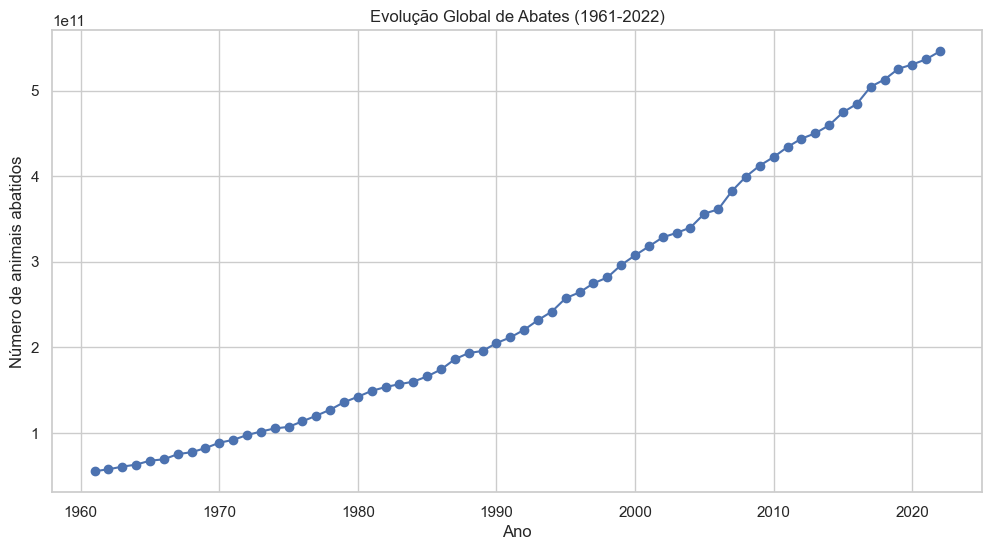

In [81]:

df_global = df.groupby("Year")["Value"].sum()
plt.figure()
df_global.plot(kind="line", marker="o")
plt.title("Evolução Global de Abates (1961-2022)")
plt.ylabel("Número de animais abatidos")
plt.xlabel("Ano")
plt.show()


## Evolução por Animal

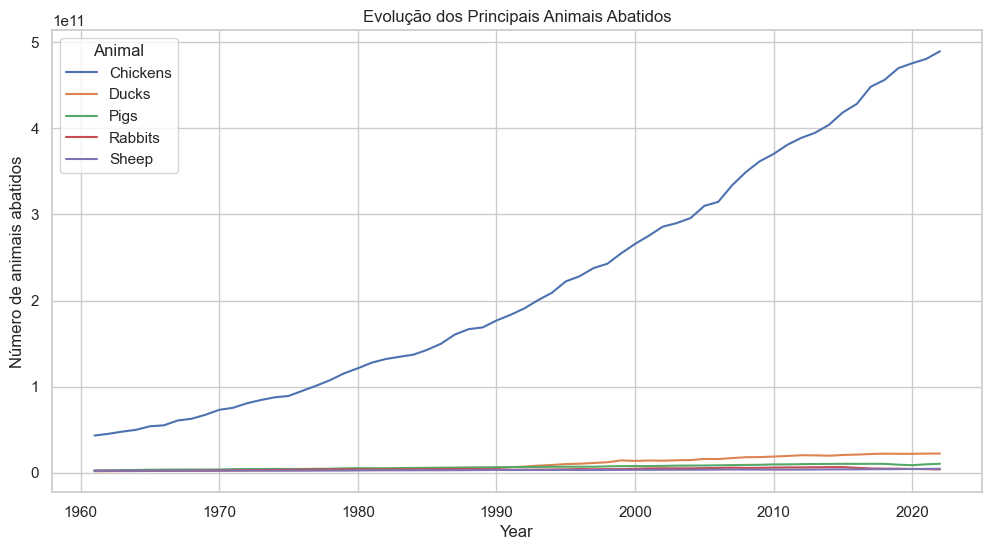

In [82]:

top_animals = df.groupby("Animal")["Value"].sum().sort_values(ascending=False).head(5).index
df_animals = df[df["Animal"].isin(top_animals)]

df_animals_grouped = df_animals.groupby(["Year","Animal"])["Value"].sum().reset_index()
plt.figure()
sns.lineplot(data=df_animals_grouped, x="Year", y="Value", hue="Animal")
plt.title("Evolução dos Principais Animais Abatidos")
plt.ylabel("Número de animais abatidos")
plt.show()


## Comparação entre Países

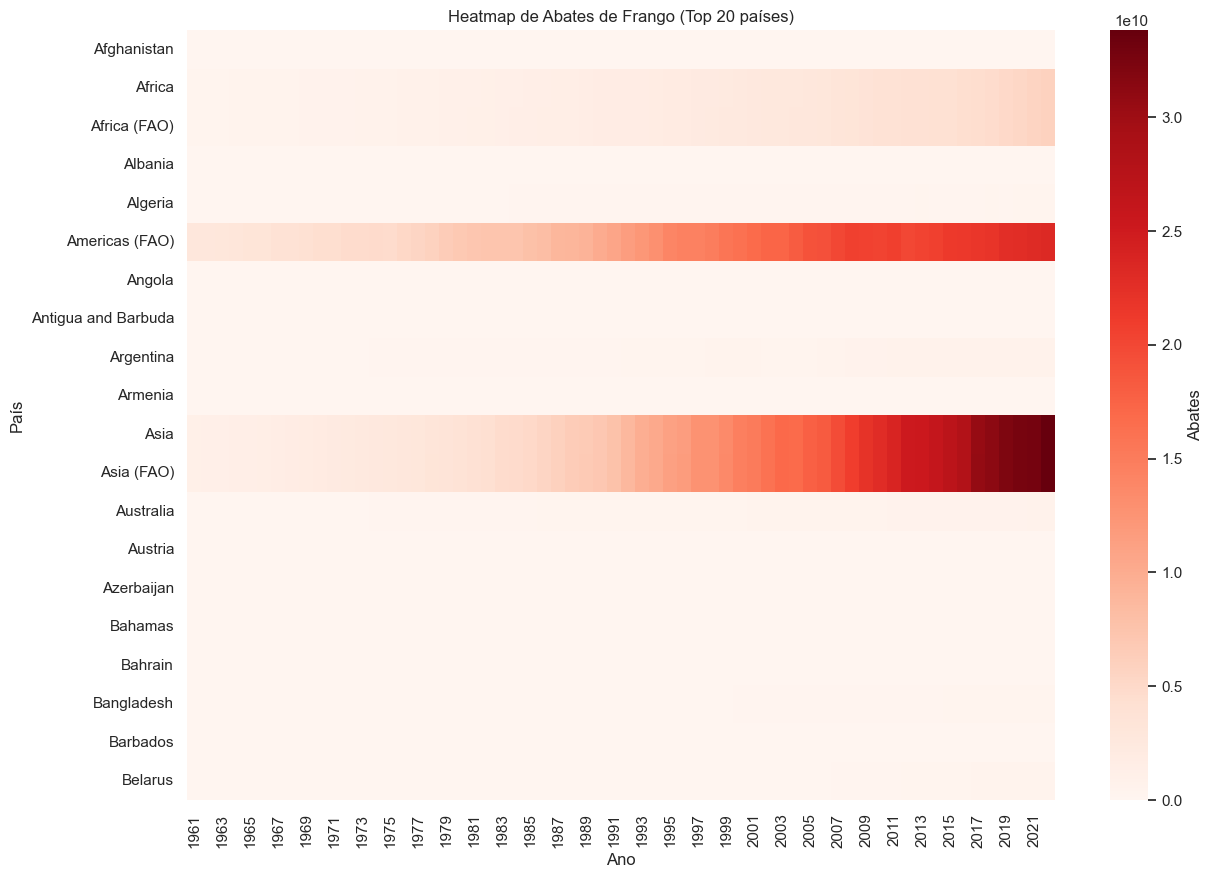

In [83]:

df_chicken = df[df["Animal"]=="Chickens"]
df_pivot = df_chicken.pivot_table(index="Entity", columns="Year", values="Value", aggfunc="sum")

plt.figure(figsize=(14,10))
sns.heatmap(df_pivot.fillna(0).iloc[:20, :], cmap="Reds", cbar_kws={'label': 'Abates'})
plt.title("Heatmap de Abates de Frango (Top 20 países)")
plt.xlabel("Ano")
plt.ylabel("País")
plt.show()


## Comparação entre Animais

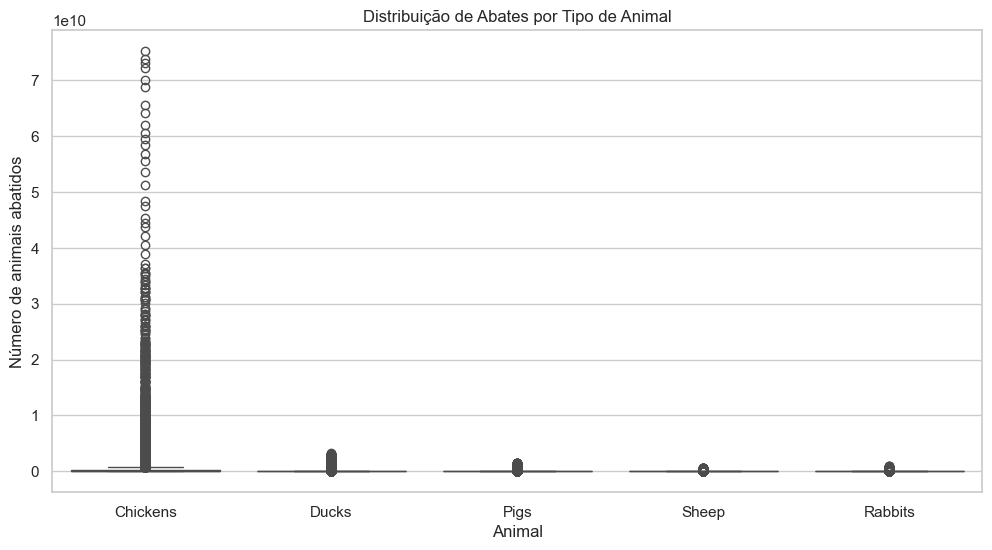

In [84]:

plt.figure()
sns.boxplot(data=df[df["Animal"].isin(top_animals)], x="Animal", y="Value")
plt.title("Distribuição de Abates por Tipo de Animal")
plt.ylabel("Número de animais abatidos")
plt.show()


In [85]:


label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])
df['Code'] = label_encoder.fit_transform(df['Code'])

encoder = OneHotEncoder(sparse_output=False) 

animal_encoded = encoder.fit_transform(df[['Animal']])

animal_encoded_df = pd.DataFrame(animal_encoded, columns=encoder.categories_[0])

df = pd.concat([df.drop('Animal', axis=1), animal_encoded_df], axis=1)


df

,Entity,Code,Year,Value,Cattle,Chickens,Ducks,Geese,Goats,Other,Pigs,Rabbits,Sheep,Turkeys
0,0,0,1961,7000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1962,7500000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1963,7700000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1964,8000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1965,8500000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143695,252,208,2018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143696,252,208,2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143697,252,208,2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143698,252,208,2021,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
df = df.fillna(0)

y = np.array(df['Value'])
x = np.array(df.drop(['Value'], axis=1))

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = SEED)
print(f"Vai treinar com {len(x_train)} amostras e classificar com {len(y_test)} amostras")

scaler = MinMaxScaler()

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

Vai treinar com 100590 amostras e classificar com 43110 amostras


In [87]:
# === Configuração de múltiplas métricas ===
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

def mostrar_metricas_cv(grid):
    """Mostra as métricas médias da validação cruzada"""
    resultados = pd.DataFrame(grid.cv_results_)
    metricas = resultados[['mean_test_r2', 'mean_test_mae', 'mean_test_mse']].iloc[grid.best_index_]
    print(f"→ Validação Cruzada (média dos folds):")
    print(f"   R² médio:  {metricas['mean_test_r2']:.4f}")
    print(f"   MAE médio: {-metricas['mean_test_mae']:.4f}")
    print(f"   MSE médio: {-metricas['mean_test_mse']:.4f}\n")

# === Regressão Linear ===
print("\n=== Regressão Linear ===")
param_grid = {}
grid = GridSearchCV(LinearRegression(), param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)
grid.fit(x_train, y_train_scaled)
best_model_linear = grid.best_estimator_
print("Métricas Validação Cruzada")
mostrar_metricas_cv(grid)

y_pred = best_model_linear.predict(x_test)
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred):.3f}; "
      f"MAE: {mean_absolute_error(y_test_scaled, y_pred):.3f}; "
      f"R²: {r2_score(y_test_scaled, y_pred):.3f}")
print(f"R² Train: {r2_score(y_train_scaled, best_model_linear.predict(x_train)):.4f} | "
      f"R² Test: {r2_score(y_test_scaled, y_pred):.4f}")


# === Regressão Árvore de Decisão ===
print("\n=== Regressão Árvore de Decisão ===")
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)
grid.fit(x_train, y_train_scaled)
best_model_tree = grid.best_estimator_
print("Métricas Validação Cruzada")
mostrar_metricas_cv(grid)

print(f"Melhores parâmetros: {grid.best_params_}")
y_pred = best_model_tree.predict(x_test)
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred):.3f}; "
      f"MAE: {mean_absolute_error(y_test_scaled, y_pred):.3f}; "
      f"R²: {r2_score(y_test_scaled, y_pred):.3f}")
print(f"R² Train: {r2_score(y_train_scaled, best_model_tree.predict(x_train)):.4f} | "
      f"R² Test: {r2_score(y_test_scaled, y_pred):.4f}")


# === Regressão Gradient Boosting ===
print("\n=== Regressão Gradient Boosting ===")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)
grid.fit(x_train, y_train_scaled)
best_model_boost = grid.best_estimator_
print("Métricas Validação Cruzada")
mostrar_metricas_cv(grid)

print(f"Melhores parâmetros: {grid.best_params_}")
y_pred = best_model_boost.predict(x_test)
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred):.3f}; "
      f"MAE: {mean_absolute_error(y_test_scaled, y_pred):.3f}; "
      f"R²: {r2_score(y_test_scaled, y_pred):.3f}")
print(f"R² Train: {r2_score(y_train_scaled, best_model_boost.predict(x_train)):.4f} | "
      f"R² Test: {r2_score(y_test_scaled, y_pred):.4f}")


# === Regressão kNN ===
print("\n=== kNN Regressivo ===")
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)
grid.fit(x_train, y_train_scaled)
best_model_knn = grid.best_estimator_
print("Métricas Validação Cruzada")
mostrar_metricas_cv(grid)

print(f"Melhores parâmetros: {grid.best_params_}")
y_pred = best_model_knn.predict(x_test)
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred):.3f}; "
      f"MAE: {mean_absolute_error(y_test_scaled, y_pred):.3f}; "
      f"R²: {r2_score(y_test_scaled, y_pred):.3f}")
print(f"R² Train: {r2_score(y_train_scaled, best_model_knn.predict(x_train)):.4f} | "
      f"R² Test: {r2_score(y_test_scaled, y_pred):.4f}")



=== Regressão Linear ===
Métricas Validação Cruzada
→ Validação Cruzada (média dos folds):
   R² médio:  0.0665
   MAE médio: 0.0031
   MSE médio: 0.0002

MSE: 0.000; MAE: 0.003; R²: 0.063
R² Train: 0.0648 | R² Test: 0.0628

=== Regressão Árvore de Decisão ===
Métricas Validação Cruzada
→ Validação Cruzada (média dos folds):
   R² médio:  0.9953
   MAE médio: 0.0001
   MSE médio: 0.0000

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2}
MSE: 0.000; MAE: 0.000; R²: 0.999
R² Train: 1.0000 | R² Test: 0.9987

=== Regressão Gradient Boosting ===


C:\Users\sofiasantana-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Métricas Validação Cruzada
→ Validação Cruzada (média dos folds):
   R² médio:  0.9780
   MAE médio: 0.0005
   MSE médio: 0.0000

Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
MSE: 0.000; MAE: 0.000; R²: 0.983
R² Train: 0.9865 | R² Test: 0.9830

=== kNN Regressivo ===
Métricas Validação Cruzada
→ Validação Cruzada (média dos folds):
   R² médio:  0.4461
   MAE médio: 0.0013
   MSE médio: 0.0001

Melhores parâmetros: {'n_neighbors': 3, 'weights': 'distance'}
MSE: 0.000; MAE: 0.001; R²: 0.702
R² Train: 1.0000 | R² Test: 0.7023


In [88]:
# Transformando o melhor modelo em um .pkl
joblib.dump(best_model_tree, "tree.pkl")


['tree.pkl']